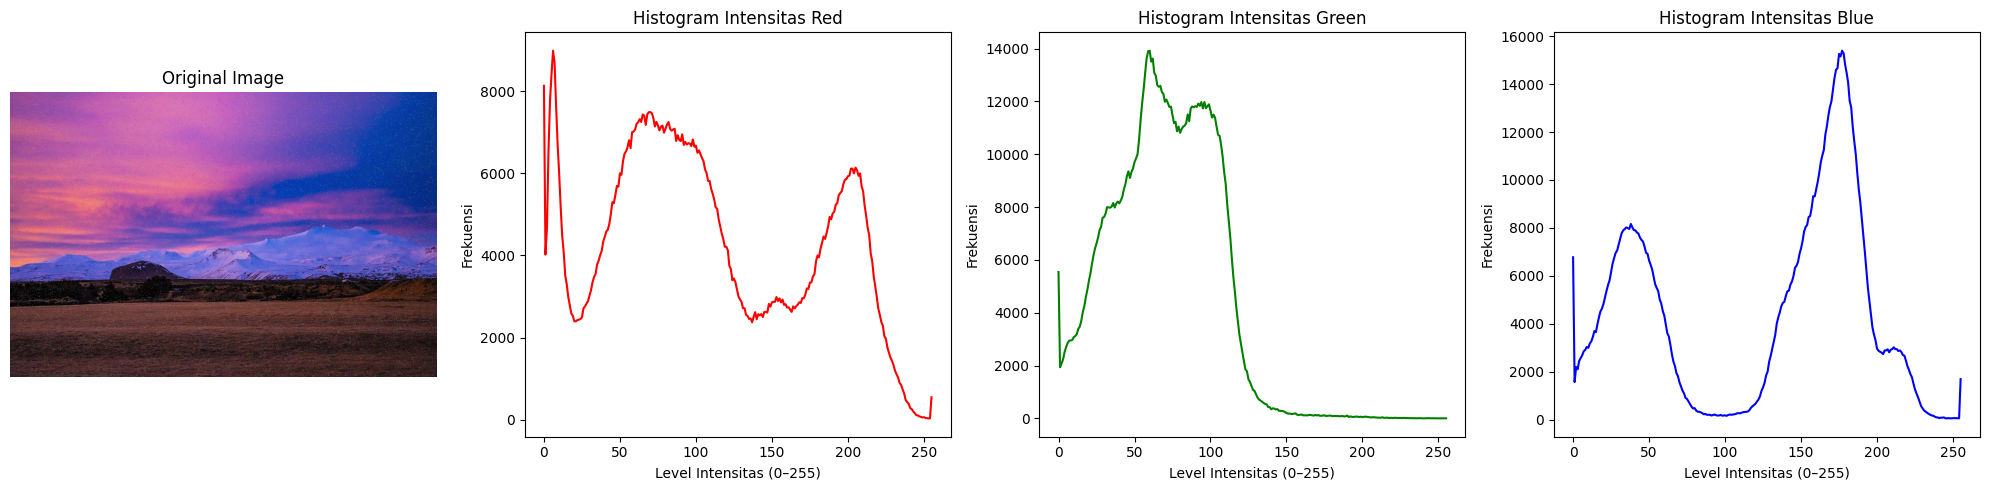

In [15]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt

# 1. Download and Decode Image
url = "https://yavuzceliker.github.io/sample-images/image-6.jpg"
resp = requests.get(url, stream=True).raw
image_array = np.asarray(bytearray(resp.read()), dtype="uint8")

# Decode bytes to OpenCV BGR format first, then to RGB
img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

colors = ['r', 'g', 'b']
channels = ['Red', 'Green', 'Blue']

# 2. Update layout to 1 row, 4 columns
plt.figure(figsize=(20, 5))

# Plot Original Image
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Plot Histograms
for i, (color, ch) in enumerate(zip(colors, channels)):
    plt.subplot(1, 4, i + 2) # Start from index 2
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title(f'Histogram Intensitas {ch}')
    plt.xlabel('Level Intensitas (0–255)')
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


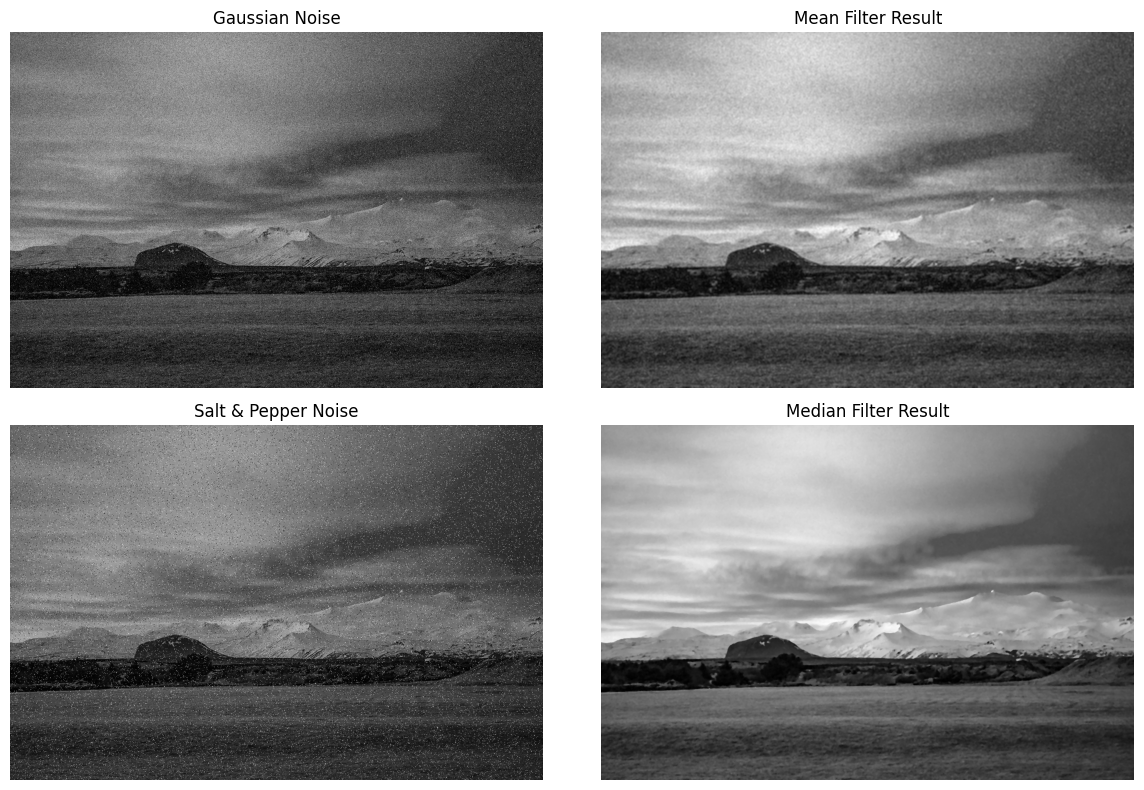

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

url = "https://yavuzceliker.github.io/sample-images/image-6.jpg"
resp = requests.get(url, stream=True).raw
image_array = np.asarray(bytearray(resp.read()), dtype="uint8")

# Decode bytes to OpenCV BGR format first, then to RGB
img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Gaussian Noise
gaussian_noise = np.random.normal(0, 20, img.shape)
img_gaussian = np.clip(img + gaussian_noise, 0, 255).astype(np.uint8)
mean_filtered = cv2.blur(img_gaussian, (5, 5))

# Salt & Pepper Noise
sp_noise = img.copy()
prob = 0.02
rand = np.random.rand(*img.shape)
sp_noise[rand < prob] = 0
sp_noise[rand > 1 - prob] = 255
median_filtered = cv2.medianBlur(sp_noise, 5)

plt.figure(figsize=(12, 8))

titles = [
    "Gaussian Noise",
    "Mean Filter Result",
    "Salt & Pepper Noise",
    "Median Filter Result"
]

images = [
    img_gaussian,
    mean_filtered,
    sp_noise,
    median_filtered
]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


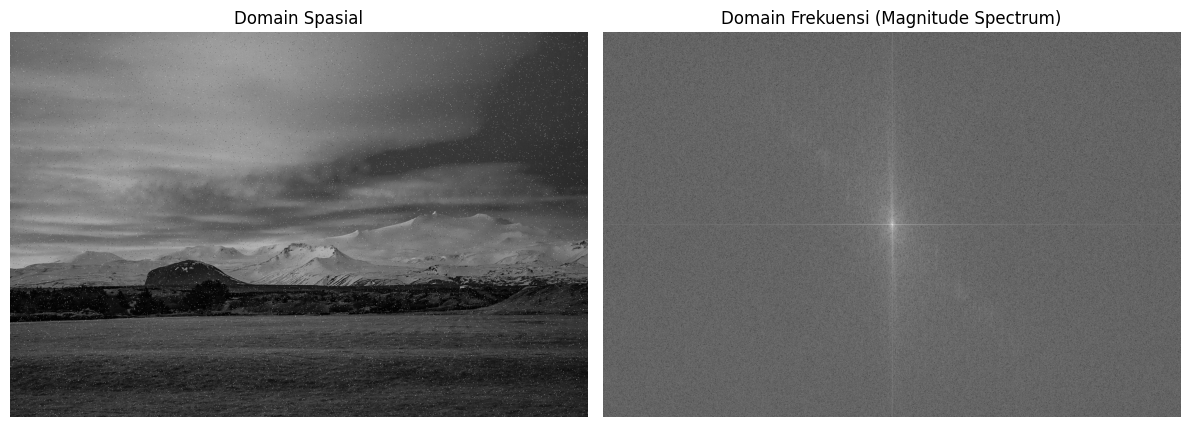

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

url = "https://yavuzceliker.github.io/sample-images/image-6.jpg"
resp = requests.get(url, stream=True).raw
image_array = np.asarray(bytearray(resp.read()), dtype="uint8")

# Decode bytes to OpenCV BGR format first, then to RGB
img_bgr = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Fourier Transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude = np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Domain Spasial")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title("Domain Frekuensi (Magnitude Spectrum)")
plt.axis('off')

plt.tight_layout()
plt.show()
